In [2]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Series03-python : Find remarkable points in a signal"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Chloé Laignel (and Copilot)"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Series03-python : Find remarkable points in a signal

03 November 2025, 15:17:46

by Chloé Laignel (and Copilot)

The goal of this series is again to code something useful, from theory to code.
The first step was a homework to make clear the theory and concepts relative to remarkable points, and to derivatives and their properties.

The current step is to code the identification of remarkable points and their visualization.

To do so, we create a new project series03-python using the template. We adapt the content of the project to the current series, and make the initial commit.

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import os


# The following magic command enables interactive matplotlib plots using ipywidgets.
# You may need to install 'ipywidgets' and 'ipympl' for this to work.
%matplotlib widget  

# 1. Draft solution

## 1.1 Find zero crossing points

Signal s: [-1  1  2  1  0 -1  1  2]
Sign s:   [-1  1  1  1  0 -1  1  1]
Change sign: [ 2  0  0 -1 -1  2  0]
Sign s short: [ 1  1  1  0 -1  1  1]
Change sign 2: [ 2  0  0  0 -1  2  0]
Is zero crossing: [ True False False False  True  True False]


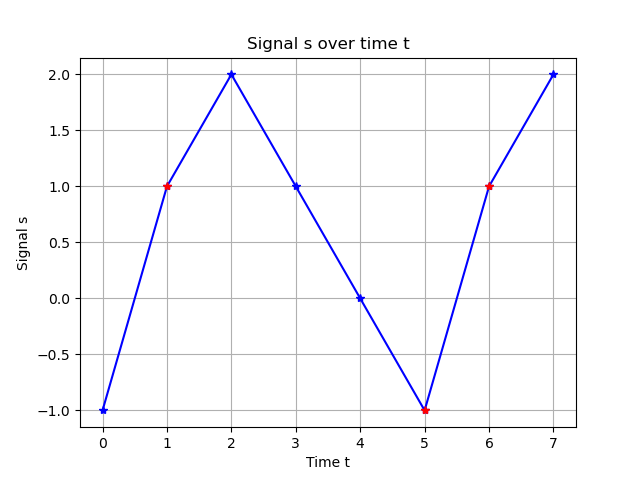

In [2]:
# Create the signal 
s = [-1, 1, 2, 1, 0, -1, 1, 2]
t = [0, 1, 2, 3, 4, 5, 6, 7] # np.arange(len(s))
# Convert to numpy arrays for easier manipulation
s = np.array(s)
t = np.array(t)

t1 = np.arange(len(s))

# Algorithm to find zero crossings
sign_s = np.sign(s)
difference_of_sign = np.diff(sign_s)

# keep the values starting at 1 up to the end
sign_s_short = sign_s[1:]  # sign_s without the last element

#change signe should be zero if sign_s_short is zero
# and should be equal to sign_s_short otherwise
# this is a way to filter out the zero values in sign_s_short
difference_of_sign_2= np.where(sign_s_short == 0, 0, difference_of_sign)

is_zero_crossing = difference_of_sign_2 != 0

# index of zero crossings
index_zero_crossings = np.where(is_zero_crossing)[0] + 1  # choice of the second index in the pair

print("Signal s:", s)
print("Sign s:  ", sign_s)
print("Change sign:", difference_of_sign)
print("Sign s short:", sign_s_short)
print("Change sign 2:", difference_of_sign_2)
print ("Is zero crossing:", is_zero_crossing)

# Plot the signal
plt.plot(t, s,'-*b')
plt.plot(t[index_zero_crossings], s[index_zero_crossings], '*r')
plt.title('Signal s over time t')
plt.xlabel('Time t')
plt.ylabel('Signal s')
plt.grid()
plt.show()


# 1.1. Find zero crossing points (V2)

In [3]:
t = 0, 1, 2, 3, 4, 5, 6
s = -1, 1, 2, 1, 0, -1, 1, 2
s=np.array(s)
t=np.array(t)

print("Signal s:", s)


Signal s: [-1  1  2  1  0 -1  1  2]


In [4]:
# version 2 using two sub arrays shifted by one element
s1 = s[:-1]
s2 = s[1:]
print("S1:", s1)
print("S2:", s2)

s_s1 =np.sign(s1)
s_s2 =np.sign(s2)
print("Sign S1:", s_s1)
print("Sign S2:", s_s2)

# change in sign by comparing s_s1 and s_s2
change_sign = s_s1 != s_s2
print("Change in sign:", change_sign)


S1: [-1  1  2  1  0 -1  1]
S2: [ 1  2  1  0 -1  1  2]
Sign S1: [-1  1  1  1  0 -1  1]
Sign S2: [ 1  1  1  0 -1  1  1]
Change in sign: [ True False False  True  True  True False]


change_sign [ True False False  True  True  True False]
is_zc: [0 5]
is_zeros: [4]
is_zc combined: [0 4 5]


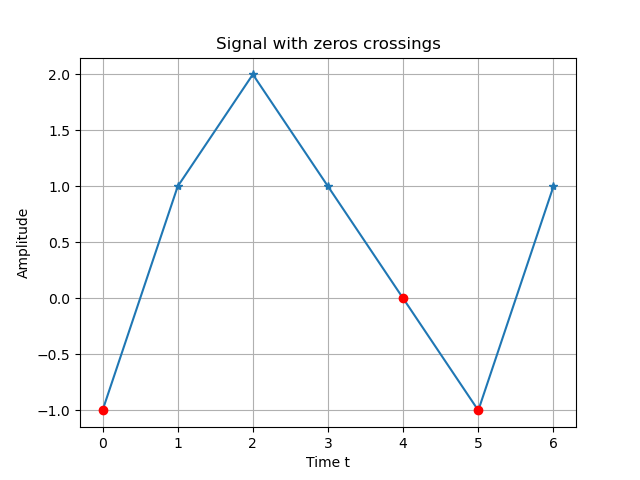

In [13]:
# index zero crossing
is_zc = np.where (change_sign)
print("change_sign", change_sign)

# index of zero crossing (real + zeros)
delta_sign = s_s1 - s_s2
is_zc = np.where (np.abs(delta_sign) > 1)[0] # obtenir les points où on a un vrai passage à zeros
is_zeros = np.where (s == 0)[0]  # obtenir les points où on a des zeros
print("is_zc:", is_zc)
print("is_zeros:", is_zeros)

# combine both
is_zc = np.sort(np.concatenate((is_zc, is_zeros)))
print("is_zc combined:", is_zc)

# plot the signal and the zero crossings
plt.figure()
plt.plot(t, s,label='Signal s', marker='*')
plt.plot(t[is_zc], s[is_zc], 'or', label='Zero Crossings')
# legend
plt.title('Signal with zeros crossings')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## 1.2. Find positive and negative zero crossing points

In [4]:
# https://nbconvert.readthedocs.io/en/latest/removing_cells.html

# https://github.com/msm1089/ipynbname/issues/17#issuecomment-1293269863


from traitlets.config import Config
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor
from IPython import get_ipython


def get_notebook_name():
    """
    Get the current notebook name (without extension).
    """
    ip = get_ipython()
    path = None
    if "__vsc_ipynb_file__" in ip.user_ns:
        path = ip.user_ns["__vsc_ipynb_file__"]

    return path.split("/")[-1].split(".")[0]


# Get the notebook name
notebook_file_name = get_notebook_name()


# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ("remove_output",)
c.TagRemovePreprocessor.remove_input_tags = ("hide",)
c.TagRemovePreprocessor.enabled = True
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

# ensure the graphics are included in the html
c.HTMLExporter.embed_images = True
# do not show the input code cells (distracts from the output)
c.HTMLExporter.exclude_output_prompt = True
c.HTMLExporter.exclude_input_prompt = True

# Configure the exporter
exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c), True)


# run our exporter - returns a tuple - first element with html,
# second with notebook metadata
output = HTMLExporter(config=c).from_filename(notebook_file_name + ".ipynb")

# Write to output html file
with open(notebook_file_name + ".html", "w") as f:
    f.write(output[0])

# open the file with the operating system
import os

# if osx use open, if linux use xdg-open, if windows use start
try:
    if os.name == "posix":
        if os.uname().sysname == "Darwin":
            # macOS
            errorCode = os.system("open " + notebook_file_name + ".html")
        else:
            # Linux
            errorCode = os.system("xdg-open " + notebook_file_name + ".html")
    elif os.name == "nt":
        # Windows
        errorCode = os.system("start " + notebook_file_name + ".html")
    else:
        print("Unsupported OS")
except Exception as e:
    print("Error opening file: ", e)